In [1]:
import tensorflow as tf

class LRHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.lr = []
    def on_batch_end(self, batch, logs={}):
        self.lr.append(self.model.optimizer.lr(self.model.optimizer.iterations))

In [2]:
import numpy as np

X = np.random.uniform(size = (800, 4))
y = np.random.uniform(size = 800)

In [8]:
from tf_keras_playground.optimizers import WarmUpSchedule

schedule = WarmUpSchedule(1e-2, 50, 1e-2)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, activation='relu', input_shape=(4, )),
  tf.keras.layers.Dense(1)
])

lr_history_callback = LRHistory()
optimizer = tf.keras.optimizers.SGD(learning_rate = schedule)

model.compile(optimizer,
              loss='mse',)
model.fit(X, y, batch_size = 8, callbacks=[lr_history_callback])

Train on 800 samples
800/800 [==============================] - 0s 563us/sample - loss: 0.2053


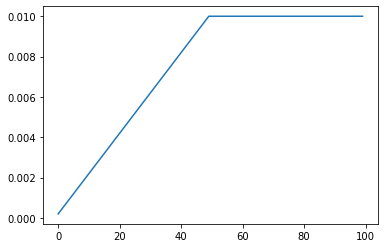

In [9]:
import matplotlib.pyplot as plt

plt.plot(lr_history_callback.lr)

In [10]:
model.save('./trained_models/warmup_schedule_test_model.h5')

In [15]:
loaded_model = tf.keras.models.load_model('./trained_models/warmup_schedule_test_model.h5', custom_objects = {'WarmUpSchedule': WarmUpSchedule})

loaded_model.optimizer.learning_rate.follow_up_schedule

0.01